In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Below is code with a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. 
Create a convolutional neural network that trains to 100% accuracy on these images,  which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

In [2]:
import tensorflow as tf
import os
import zipfile


DESIRED_ACCURACY = 0.999

!wget --no-check-certificate \
    "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
    -O "/tmp/happy-or-sad.zip"

zip_ref = zipfile.ZipFile("/tmp/happy-or-sad.zip", 'r')
zip_ref.extractall("/tmp/h-or-s")
zip_ref.close()

--2020-04-10 20:56:21--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-04-10 20:56:22 (207 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [3]:
# Directory with our training horse pictures
train_happy_dir = os.path.join('/tmp/h-or-s/happy')

# Directory with our training human pictures
train_sad_dir = os.path.join('/tmp/h-or-s/sad')
!ls /tmp/h-or-s

happy  sad


In [4]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])


['happy1-00.png', 'happy2-15.png', 'happy1-14.png', 'happy1-07.png', 'happy1-16.png', 'happy2-18.png', 'happy2-09.png', 'happy1-12.png', 'happy2-16.png', 'happy1-19.png']
['sad1-18.png', 'sad2-01.png', 'sad2-09.png', 'sad1-01.png', 'sad2-08.png', 'sad2-04.png', 'sad1-00.png', 'sad2-05.png', 'sad2-02.png', 'sad1-15.png']


In [5]:
print("train happy names len is %s" % len(train_happy_names))
print("train sad names len is %s" % len(train_sad_names))

train happy names len is 40
train sad names len is 40


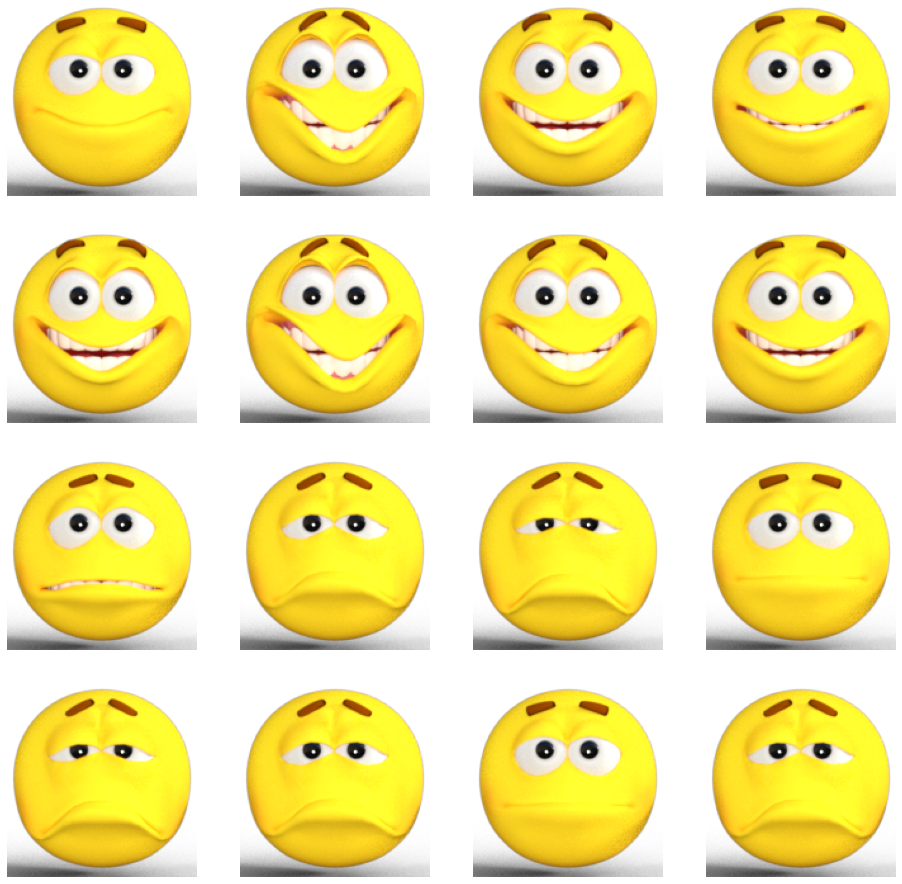

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [7]:
temp_img_path = os.path.join(train_happy_dir, train_happy_names[0]) 
print(mpimg.imread(temp_img_path).shape)

(150, 150, 4)


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  # Your Code
  def on_epoch_end(self, epoch, logs={}):
      if (logs.get("accuracy") >= DESIRED_ACCURACY):
        self.model.stop_training = True
        print("Reached 99% accuracy so cancelling training!")

callbacks = myCallback()

In [0]:
# This Code Block should Define and Compile the Model
model = tf.keras.models.Sequential([
# Your Code Here
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(8,8), 
                           activation=tf.keras.activations.relu,
                           input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(8,8)),
    tf.keras.layers.Conv2D(filters=16, 
                           kernel_size=(2,2), 
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=32, 
                           kernel_size=(2,2), 
                           activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, 
                          activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,
                           activation=tf.keras.activations.sigmoid)
])


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 143, 143, 32)      6176      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 16)        2064      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)              

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [24]:
# This code block should create an instance of an ImageDataGenerator called train_datagen 
# And a train_generator by calling train_datagen.flow_from_directory

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)# Your Code Here

train_generator = train_datagen.flow_from_directory(
    directory="/tmp/h-or-s",
    target_size=(150,150),
    color_mode="rgb",
    batch_size=256,
    class_mode="binary"
    )
# Your Code Here

# Expected output: 'Found 80 images belonging to 2 classes'

Found 80 images belonging to 2 classes.


In [26]:
# This code block should call model.fit and train for
# a number of epochs. 
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=8,  
    callbacks=[callbacks]
    )
# Your Code Here    
# Expected output: "Reached 99.9% accuracy so cancelling training!""

Epoch 1/15
8/8 [==============================] - 1s 109ms/step - loss: 6.3553e-06 - accuracy: 1.0000
